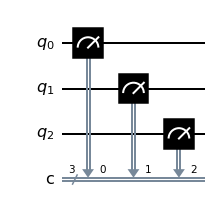

In [5]:
# Very basic quantum circuit
from qiskit import QuantumCircuit

# create a circuit with 3 qubits for operations and 3 classical bits for output
qc = QuantumCircuit(3, 3)
# measure the quantum bits in register slots 0, 1, 2 and output to corresponding classical register slots
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl");

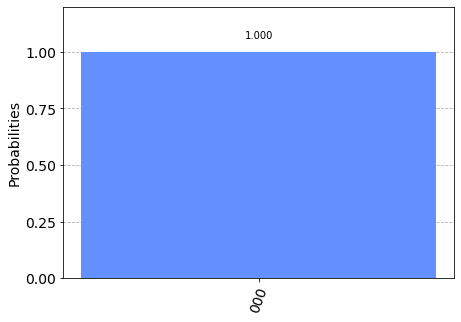

In [6]:
# Simulating the circuit on a real computer
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()
job = sim.run(qc)
countDict = job.result().get_counts()
plot_histogram(countDict);

In [21]:
# Modifying the quantum circuit
qc = QuantumCircuit(3, 3)
qc.x([0, 1])  # apply X gate to qubits at register slots 0 and 1
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl");

ImportError: The latex and latex_source drawers need pylatexenc installed. Run "pip install pylatexenc" before using the latex or latex_source drawers.

In [ ]:
# Adding superposition with the H gate
qc = QuantumCircuit(3, 3)
qc.h([0])  # apply H gate to qubit at register slot 0
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl");

In [ ]:
# Adding more superpositions: measurement histogram changes
qc = QuantumCircuit(3, 3)
qc.h([0, 1])  # apply H gate to qubit at register slot 0
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output="mpl");

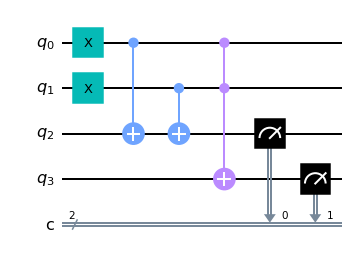

In [15]:
# Implementing the Half-Adder
# A half-adder takes in two bits of input (0 or 1) and "adds" their values (returning 0, 1, or 2 accordingly)
halfAdder = QuantumCircuit(4, 2)  # 2 qubits input & 2 auxiliary qubits; 2 clasical bits output
halfAdder.x([0, 1])  # change the inputs as needed to encode the desired starting values
halfAdder.cx(0, 2)  # CNOT gate: flips auxiliary bit 1 from 0 -> 1 if the first input bit is 1
halfAdder.cx(1, 2)  # CNOT on the second git: flips the same auxiliary bit if the second input is 1
# Note that if both inputs were 1, the first auxiliary bit (representing the ones place) will be 0 since the sum is 10 in binary

halfAdder.ccx(0, 1, 3)  # Controlled-Controlled-NOT (Toffoli Gate): acts like logical AND; only flips auxiliary bit 2 if both inputs are 1

halfAdder.measure([2, 3], [0, 1])  # measure the auxiliary bits to the output register
halfAdder.draw(output="mpl");


In [11]:
# Encapsulating the half-adder into a function for easier experimentation
def generateHalfAdder(in1, in2):
    ha = QuantumCircuit(4, 2)
    if in1 == 1:
        ha.x(0)
    if in2 == 1:
        ha.x(1)
    ha.cx(0, 2)
    ha.cx(1, 2)
    ha.ccx(0, 1, 3)
    ha.measure([2, 3], [0, 1])
    ha.draw(output="mpl");
    return ha

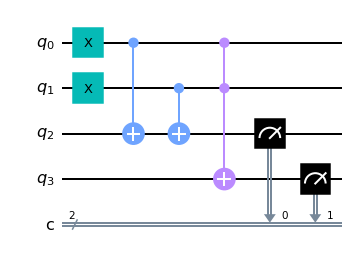

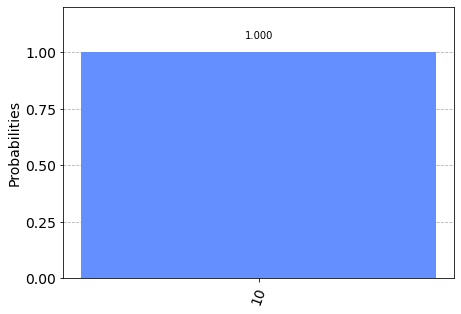

In [18]:
# Simulating the half-adder on various inputs
adderJob = sim.run(generateHalfAdder(1, 1))  # create and run half-adder with the given inputs
adderResults = adderJob.result().get_counts()  # retrieve the simulated result
plot_histogram(adderResults);  # plot the output
